In [2]:
import pandas as pd

# 打开 user_work_records_2.xlsx 文件
file_path = 'user_work_records_2.xlsx'  # 请确保文件路径正确
df = pd.read_excel(file_path)

# 显示文件内容的前几行
print(df.head())

                user   work_id fandom
0    ['Clairshadows'  25964908     sw
1            'Fiish'  25964908     sw
2           'esmyra'  25964908     sw
3   'DarkenedProngs'  25964908     sw
4  'TheWhiteWolf140'  25964908     sw


In [6]:
# 按 'user' 列分组，并计算每个用户关联的作品数量
user_abundance = df.groupby('user')['work_id'].count().reset_index(name='abundance')

# 显示用户丰富度表
print(user_abundance.head())

             user  abundance
0          '0018'          1
1          '0037'          1
2  '00Kirahime00'         18
3          '00La'          1
4   '00Q007Narry'          1


In [7]:
# 将丰富度数据与原始数据合并
df_with_abundance = pd.merge(df, user_abundance, on='user')

# 显示合并后的数据
print(df_with_abundance.head())

               user   work_id fandom  abundance
0   ['Clairshadows'  25964908     sw          1
1           'Fiish'  25964908     sw          2
2           'Fiish'  31905457     sw          2
3          'esmyra'  25964908     sw          1
4  'DarkenedProngs'  25964908     sw          2


In [8]:
# 将结果保存到新的 Excel 文件
df_with_abundance.to_excel('user_work_records_with_abundance.xlsx', index=False)

print("用户丰富度已计算并保存至 'user_work_records_with_abundance.xlsx'")

用户丰富度已计算并保存至 'user_work_records_with_abundance.xlsx'


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
df = pd.read_excel('user_work_records_2.xlsx')

# 计算用户丰富度（每个用户关联的作品数量）
user_abundance = df.groupby('user')['work_id'].count().reset_index(name='abundance')

图表已保存至: /Users/mykilee/Desktop/user_abundance_distribution.png


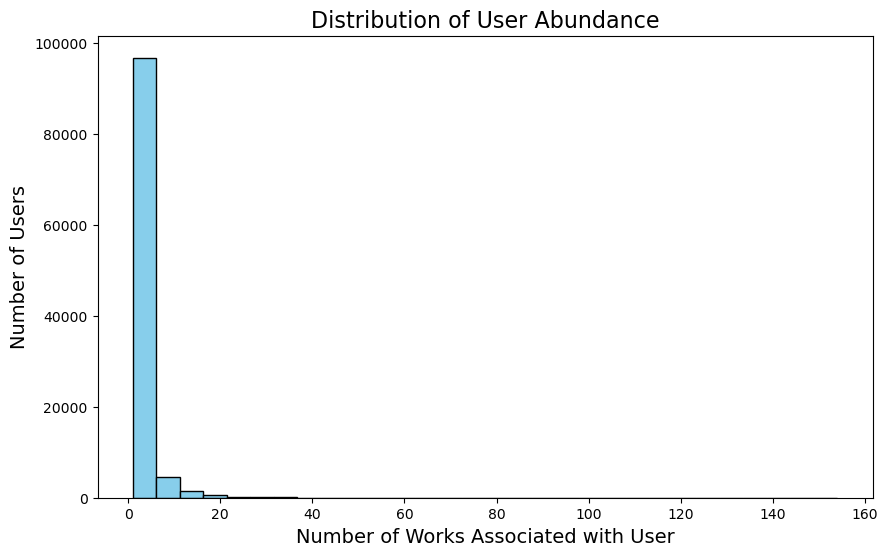

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 读取 Excel 文件
df = pd.read_excel('user_work_records_2.xlsx')

# 计算用户丰富度（每个用户关联的作品数量）
user_abundance = df.groupby('user')['work_id'].count().reset_index(name='abundance')

# 绘制用户丰富度的直方图
plt.figure(figsize=(10, 6))
plt.hist(user_abundance['abundance'], bins=30, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title('Distribution of User Abundance', fontsize=16)
plt.xlabel('Number of Works Associated with User', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# 获取桌面路径
desktop_path = os.path.expanduser("~/Desktop")

# 保存图表到桌面
output_path = os.path.join(desktop_path, 'user_abundance_distribution.png')
plt.savefig(output_path)

print(f"图表已保存至: {output_path}")

In [14]:
import pandas as pd

# 读取原始数据
df = pd.read_excel('user_work_records_2.xlsx')

# 定义函数计算用户丰富度
def calculate_abundance(group):
    group['abundance'] = group['work_id'].count()
    return group

# 按fandom分组并计算丰富度
df = df.groupby(['fandom', 'user']).apply(calculate_abundance)

# 获取所有唯一的fandom名称
fandoms = df['fandom'].unique()

# 创建并保存每个fandom的用户丰富度表格
for fandom in fandoms:
    # 过滤出当前fandom的数据
    df_fandom = df[df['fandom'] == fandom]
    
    # 保留相关列
    df_fandom = df_fandom[['user', 'work_id', 'fandom', 'abundance']]
    
    # 保存到一个新的Excel文件
    output_filename = f'{fandom}_user_abundance.xlsx'
    df_fandom.to_excel(output_filename, index=False)
    print(f'{output_filename} 已生成并保存。')

/var/folders/qq/mhcj179n5kq19qn8ckv1mk040000gn/T/ipykernel_21523/2879352296.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby(['fandom', 'user']).apply(calculate_abundance)


sw_user_abundance.xlsx 已生成并保存。
st_user_abundance.xlsx 已生成并保存。
mv_user_abundance.xlsx 已生成并保存。
dc_user_abundance.xlsx 已生成并保存。
hp_user_abundance.xlsx 已生成并保存。


图表已保存至: /Users/mykilee/Desktop/sw_user_abundance_distribution.png


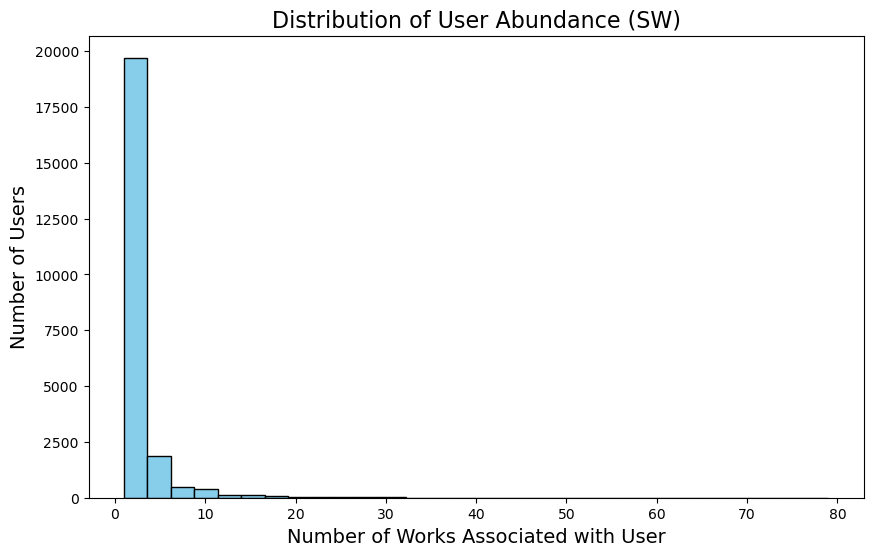

图表已保存至: /Users/mykilee/Desktop/st_user_abundance_distribution.png


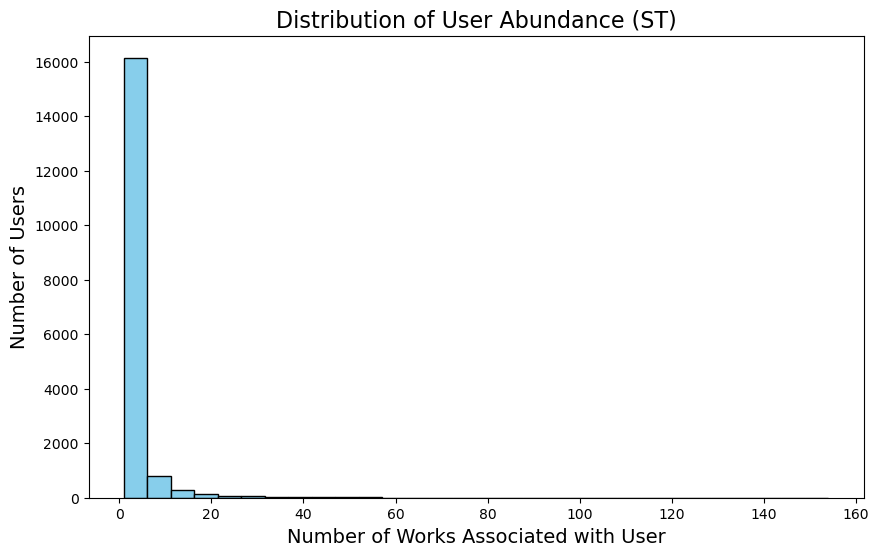

图表已保存至: /Users/mykilee/Desktop/hp_user_abundance_distribution.png


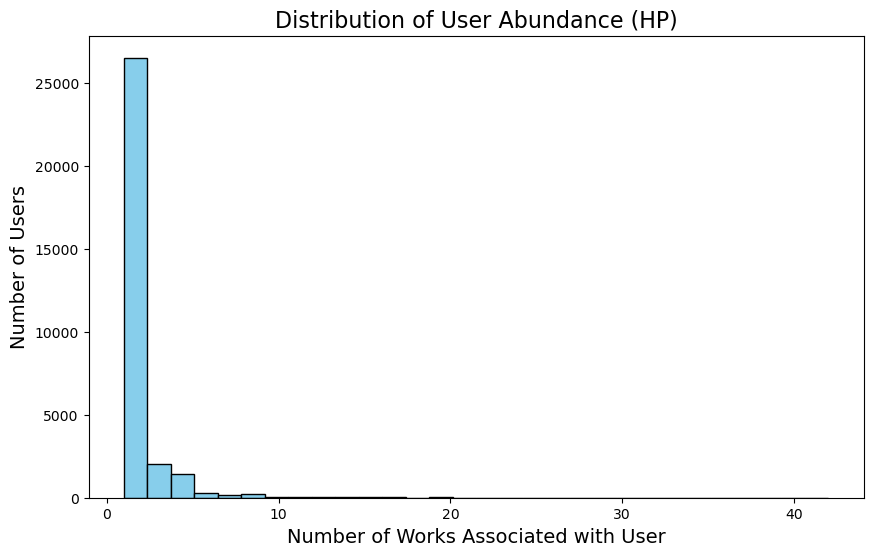

图表已保存至: /Users/mykilee/Desktop/dc_user_abundance_distribution.png


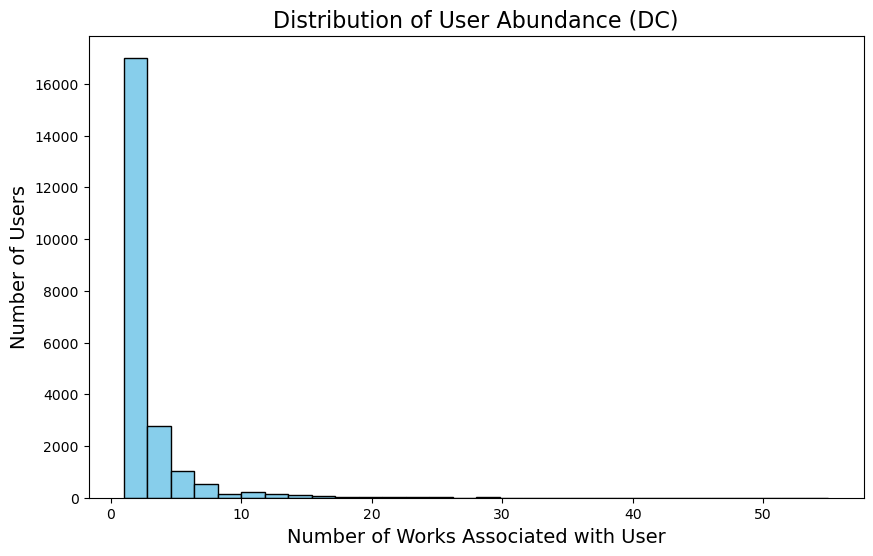

图表已保存至: /Users/mykilee/Desktop/mv_user_abundance_distribution.png


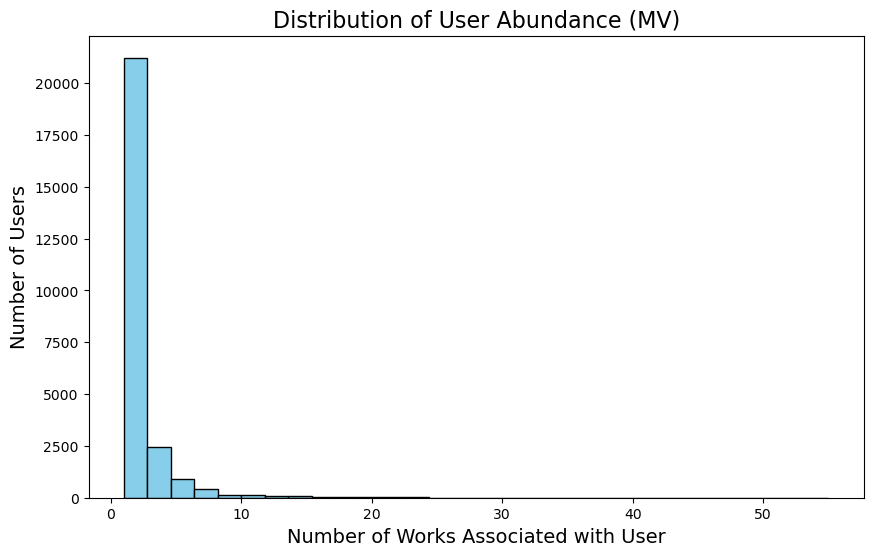

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义fandom的名称列表
fandoms = ['sw', 'st', 'hp', 'dc', 'mv']

# 获取桌面路径
desktop_path = os.path.expanduser("~/Desktop")

# 处理每个fandom的文件
for fandom in fandoms:
    # 生成文件名
    filename = f'{fandom}_user_abundance.xlsx'
    
    # 读取 Excel 文件
    df = pd.read_excel(filename)
    
    # 计算用户丰富度（每个用户关联的作品数量）
    user_abundance = df.groupby('user')['work_id'].count().reset_index(name='abundance')
    
    # 绘制用户丰富度的直方图
    plt.figure(figsize=(10, 6))
    plt.hist(user_abundance['abundance'], bins=30, color='skyblue', edgecolor='black')
    
    # 添加标题和标签
    plt.title(f'Distribution of User Abundance ({fandom.upper()})', fontsize=16)
    plt.xlabel('Number of Works Associated with User', fontsize=14)
    plt.ylabel('Number of Users', fontsize=14)
    
    # 保存图表到桌面
    output_filename = f'{fandom}_user_abundance_distribution.png'
    output_path = os.path.join(desktop_path, output_filename)
    plt.savefig(output_path)
    
    print(f"图表已保存至: {output_path}")

    # 显示当前图表
    plt.show()

图表已保存至: /Users/mykilee/Desktop/fandom_user_abundance_distributions.png


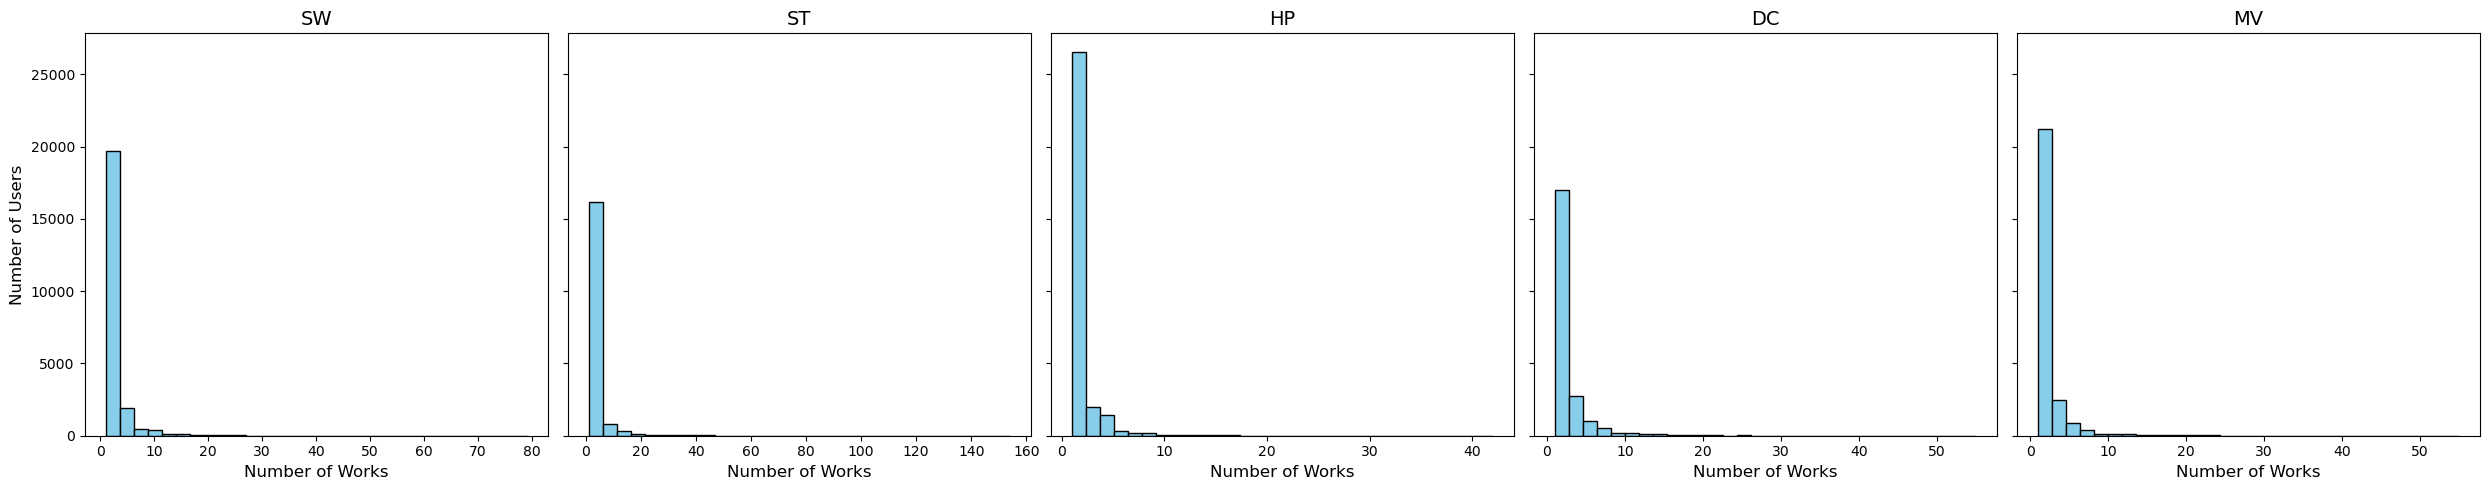

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 定义fandom的名称列表
fandoms = ['sw', 'st', 'hp', 'dc', 'mv']

# 获取桌面路径
desktop_path = os.path.expanduser("~/Desktop")

# 创建一个大的图形窗口，并定义子图的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

# 处理每个fandom的文件
for i, fandom in enumerate(fandoms):
    # 生成文件名
    filename = f'{fandom}_user_abundance.xlsx'
    
    # 读取 Excel 文件
    df = pd.read_excel(filename)
    
    # 计算用户丰富度（每个用户关联的作品数量）
    user_abundance = df.groupby('user')['work_id'].count().reset_index(name='abundance')
    
    # 在子图中绘制用户丰富度的直方图
    axes[i].hist(user_abundance['abundance'], bins=30, color='skyblue', edgecolor='black')
    
    # 添加标题和标签
    axes[i].set_title(f'{fandom.upper()}', fontsize=14)
    axes[i].set_xlabel('Number of Works', fontsize=12)
    if i == 0:  # 只有第一个子图显示y轴标签
        axes[i].set_ylabel('Number of Users', fontsize=12)

# 调整布局，确保图表不会重叠
plt.tight_layout()

# 保存整个图形到桌面
output_path = os.path.join(desktop_path, 'fandom_user_abundance_distributions.png')
plt.savefig(output_path)

print(f"图表已保存至: {output_path}")

# 显示图表
plt.show()